# 9장 시계열을위한 머신러닝 (디시전트리)

> 디시전트리, 랜덤포레스트, XGBoost 등을 다룬다.
- author: "Chansung Park"
- toc: false
- comments: false
- categories: [machine learning, decision tree, random forest, supervised learning]
- permalink: /chapter9-decision-tree/
- badges: true
- hide_github_badge: true

In [2]:
!pip install cesium

     |████████████████████████████████| 225kB 8.9MB/s 
     |████████████████████████████████| 563kB 8.7MB/s 
  Created wheel for gatspy: filename=gatspy-0.3-cp37-none-any.whl size=43807 sha256=8a8fd8cd1014706c5c49b62bf86eb8ee4147006cf3e4f0c8390711806409a44b
  Stored in directory: /root/.cache/pip/wheels/4f/8f/fa/0d7b250ef21828ca373b21f6b3b6ef0f2a0e3560b69c91e55d
Successfully built gatspy


In [3]:
from cesium import datasets

In [4]:
eeg = datasets.fetch_andrzejak()

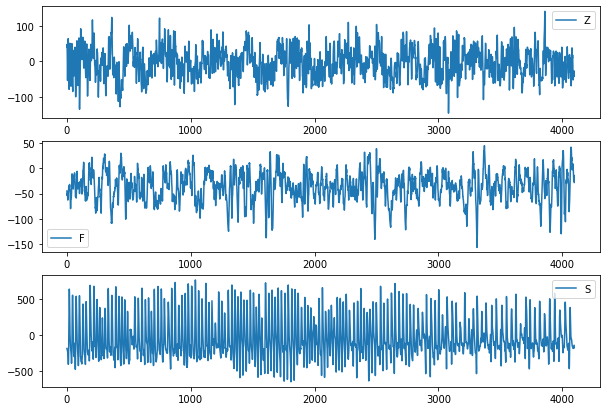

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))

plt.subplot(3, 1, 1)
plt.plot(eeg["measurements"][0])
plt.legend(eeg['classes'][0])
plt.subplot(3, 1, 2)
plt.plot(eeg["measurements"][300])
plt.legend(eeg['classes'][300])
plt.subplot(3, 1, 3)
plt.plot(eeg["measurements"][450])
plt.legend(eeg['classes'][450])

In [10]:
from cesium.featurize import featurize_time_series as ft

features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "percent_close_to_median",
                   "skew",
                   "max_slope"]

fset_cesium = ft(times = eeg["times"],
                 values = eeg["measurements"],
                 errors = None,
                 features_to_use = features_to_use,
                 scheduler = None)

In [11]:
fset_cesium.head()

feature,amplitude,percent_beyond_1_std,percent_close_to_median,skew,max_slope
channel,0,0,0,0,0
0,143.5,0.327313,0.505004,0.032805,11107.796610
1,211.5,0.290212,0.640469,-0.092715,20653.559322
2,165.0,0.302660,0.515987,-0.004100,13537.627119
3,171.5,0.300952,0.541128,0.063678,17008.813559
4,170.0,0.305101,0.566268,0.142753,13016.949153


In [14]:
import numpy as np

np.std(eeg["measurements"][0])

40.41100040099819

In [15]:
np.mean(eeg['measurements'][0])

-4.1320478398828415

In [16]:
sample_ts = eeg["measurements"][0]
sz = len(sample_ts)
ll = -4.13 - 40.4
ul = -4.13 + 40.4
quals = [i for i in range(sz) if sample_ts[i] < ll or sample_ts[i] > ul]

In [22]:
len(quals)/sz

0.3273126678057115

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fset_cesium.values, eeg["classes"], random_state=21)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 10,
                                max_depth = 3,
                                random_state = 21)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [26]:
rf_clf.score(X_test, y_test)

0.616

In [27]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10,
                            max_depth = 3,
                            random_state = 21)

xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.648

In [30]:
import time

start = time.time()
xgb_clf.fit(X_train, y_train)
end = time.time()
end - start

0.01726841926574707

In [31]:
start = time.time()
rf_clf.fit(X_train, y_train)
end = time.time()
end - start

0.01841139793395996

In [32]:
xgb_clf = xgb.XGBClassifier(n_estimators = 10,
max_depth = 2,
random_state = 21)
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.616

In [34]:
rf_clf = RandomForestClassifier(n_estimators = 10,
                                max_depth = 2,
                                random_state = 21)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.544

In [35]:
xgb_clf = xgb.XGBClassifier(n_estimators = 10,
                            max_depth = 1,
                            random_state = 21)
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.632

In [36]:
rf_clf = RandomForestClassifier(n_estimators = 10,
                                max_depth = 1,
                                random_state = 21)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.376